# Trabajo Practico 1
## Objetivo

El objetivo del primer TP es realizar un análisis exploratorio del set de datos del TP. Queremos
ver qué cosas podemos descubrir sobre los datos que puedan resultar interesantes. Los
requisitos de la primera entrega son los siguientes:
- El análisis debe estar hecho en Python Pandas o R.
- El análisis debe entregarse en formato papel en una carpeta en donde se incluya el
reporte completo y todas las visualizaciones generadas. Es altamente recomendable
que las visualizaciones se impriman en color.
- Informar el link a un repositorio Github en donde pueda bajarse el código completo para
generar el análisis.
- Agregar en Kaggle un kernel con el análisis exploratorio realizado

## Evaluación
La evaluación del TP se realizará en base al siguiente criterio:
- Originalidad del análisis exploratorio.
- Calidad del reporte. ¿Está bien escrito? ¿Es claro y preciso?
- Calidad del análisis exploratorio: qué tipo de preguntas se hacen y de qué forma se
responden, ¿es la respuesta clara y concisa con respecto a la pregunta formulada?
- Calidad de las visualizaciones presentadas.
- ¿Tienen todos los ejes su rótulo?
- ¿Tiene cada visualización un título?
- ¿Es entendible la visualización sin tener que leer la explicación?
- ¿El tipo de plot elegido es adecuado para lo que se quiere visualizar?
- ¿Es una visualización interesante?
- ¿El uso del color es adecuado?
- ¿Hay un exceso o falta de elementos visuales en la visualización elegida?
- ¿La visualización es consistente con los datos?
- Conclusiones presentadas.
- ¿Presenta el grupo un listado de "insights" aprendidos sobre los datos en base al
análisis realizado? ¿Es interesante?
- ¿Descubrieron cosas que pueden ser de interés para las empresas en busca de
nuevos recursos?
- ¿Descubrieron cosas que pueden ser de interés a las personas en busca de
trabajo?
- ¿El análisis realiza un aporte a Navent?
El grupo que realice el mejor análisis exploratorio obtendrá 10 puntos para cada uno de sus
integrantes que podrán ser usados en el parcial además de ser publicado en el repositorio de la
materia como ejemplo para los siguientes cuatrimestres.

In [ ]:
##-----------------------------------------------------------------------------------##
## importacion general de librerias y de visualizacion (matplotlib y seaborn)        ##
##-----------------------------------------------------------------------------------##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

##-----------------------------------------------------------------------------------##
## Libs agregadas por Julian Matias                                                  ##
##-----------------------------------------------------------------------------------##
from bokeh.plotting import figure, show
import string as string
import datetime as datetime
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
geolocator = Nominatim()
from bokeh.io import output_file, output_notebook, show
from bokeh.models import (
  GMapPlot, GMapOptions, ColumnDataSource, Circle, LogColorMapper, BasicTicker, ColorBar,
    DataRange1d, Range1d, PanTool, WheelZoomTool, BoxSelectTool
)
from bokeh.models.mappers import ColorMapper, LinearColorMapper
from bokeh.palettes import Viridis5

In [ ]:
##-----------------------------------------------------------------------------------##
## Para verificar que sys path está usando                                           ##
##-----------------------------------------------------------------------------------##
import sys
print(sys.executable)
print(sys.path)


In [ ]:
##-----------------------------------------------------------------------------------##
## Cargo los archivos                                                                ##
##-----------------------------------------------------------------------------------##

path_to_datos_navent = '../Data/Navent/'

postulantes_educacion = pd.read_csv(path_to_datos_navent + 'fiuba_1_postulantes_educacion.csv', sep=',', encoding='utf-8', low_memory=False)
postulantes_genero_edad = pd.read_csv(path_to_datos_navent + 'fiuba_2_postulantes_genero_y_edad.csv', sep=',', encoding='utf-8', low_memory=False)
postulaciones = pd.read_csv(path_to_datos_navent + 'fiuba_4_postulaciones.csv', sep=',', encoding='utf-8', low_memory=False)
vistas = pd.read_csv(path_to_datos_navent + 'fiuba_3_vistas.csv', sep=',', encoding='utf-8', low_memory=False)
avisos_online = pd.read_csv(path_to_datos_navent + 'fiuba_5_avisos_online.csv', sep=',', encoding='utf-8', low_memory=False)
avisos_detalles = pd.read_csv(path_to_datos_navent + 'fiuba_6_avisos_detalle.csv', sep=',', encoding='utf-8', low_memory=False)



In [ ]:
##-----------------------------------------------------------------------------------##
## hago un join usando como indice el idpostulante                                   ##
## https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html ##
##-----------------------------------------------------------------------------------##

postulantes = postulantes_educacion.join(postulantes_genero_edad.set_index('idpostulante'), on='idpostulante')


In [ ]:
##-----------------------------------------------------------------------------------##
## Acoto la descripcion del sexo de los postulantes a "M" o "F"                      ##
##-----------------------------------------------------------------------------------##
postulantes.loc[postulantes['sexo'] == 'MASC', 'sexo'] = 'M'
postulantes.loc[postulantes['sexo'] == 'FEM', 'sexo'] = 'F'


In [ ]:
##-----------------------------------------------------------------------------------##
## Exporto a un csv                                                                  ##
##-----------------------------------------------------------------------------------##
postulantes.to_csv(path_to_datos_navent + 'postulantes.csv',  index=False)


In [ ]:
##-----------------------------------------------------------------------------------##
## creo un estado para los avisos (online o offline)                                 ##
##-----------------------------------------------------------------------------------##
avisos_online['estado'] = 'online'


In [ ]:
##-----------------------------------------------------------------------------------##
## El csv de avisos online lo uno al csv de avisos detalle                           ##
##-----------------------------------------------------------------------------------##
avisos = avisos_detalles.join(avisos_online.set_index('idaviso'), on='idaviso')


In [ ]:
##-----------------------------------------------------------------------------------##
## Agrego una columna con el estado del aviso, "online" o "offline"                  ##
##-----------------------------------------------------------------------------------##
avisos['estado'].fillna('offline',inplace=True)


In [ ]:
##-----------------------------------------------------------------------------------##
## El id pais no tiene sentido usarlo porque hay uno solo                            ##
##-----------------------------------------------------------------------------------##
avisos[avisos['idpais'] != 1]


In [ ]:
##-----------------------------------------------------------------------------------##
## La informacion de la ciudad esta contenida en la zona                             ##
## y la columna no aporta nada, tiene muchos datos erroneos                          ##
##-----------------------------------------------------------------------------------##
avisos_detalles.groupby('ciudad')['ciudad'].count()


In [ ]:
##-----------------------------------------------------------------------------------##
## concateno el mapa de la calle con el nombre de la zona para                       ##
## tenerlo en una sola variable para buscar la localizacion                          ##
##-----------------------------------------------------------------------------------##
avisos['loc'] = avisos['mapacalle'] + ', ' + avisos['nombre_zona']


In [ ]:
##-----------------------------------------------------------------------------------##
## hay muchas localizaciones las cuales son simplemente barrios en CABA              ##
## y otras que son confusas                                                          ##
##-----------------------------------------------------------------------------------##
avisos_detalles.groupby('mapacalle')['mapacalle'].count().sort_values(ascending=False)


Text(0.5,1,'Anuncios por Jornada Laboral')

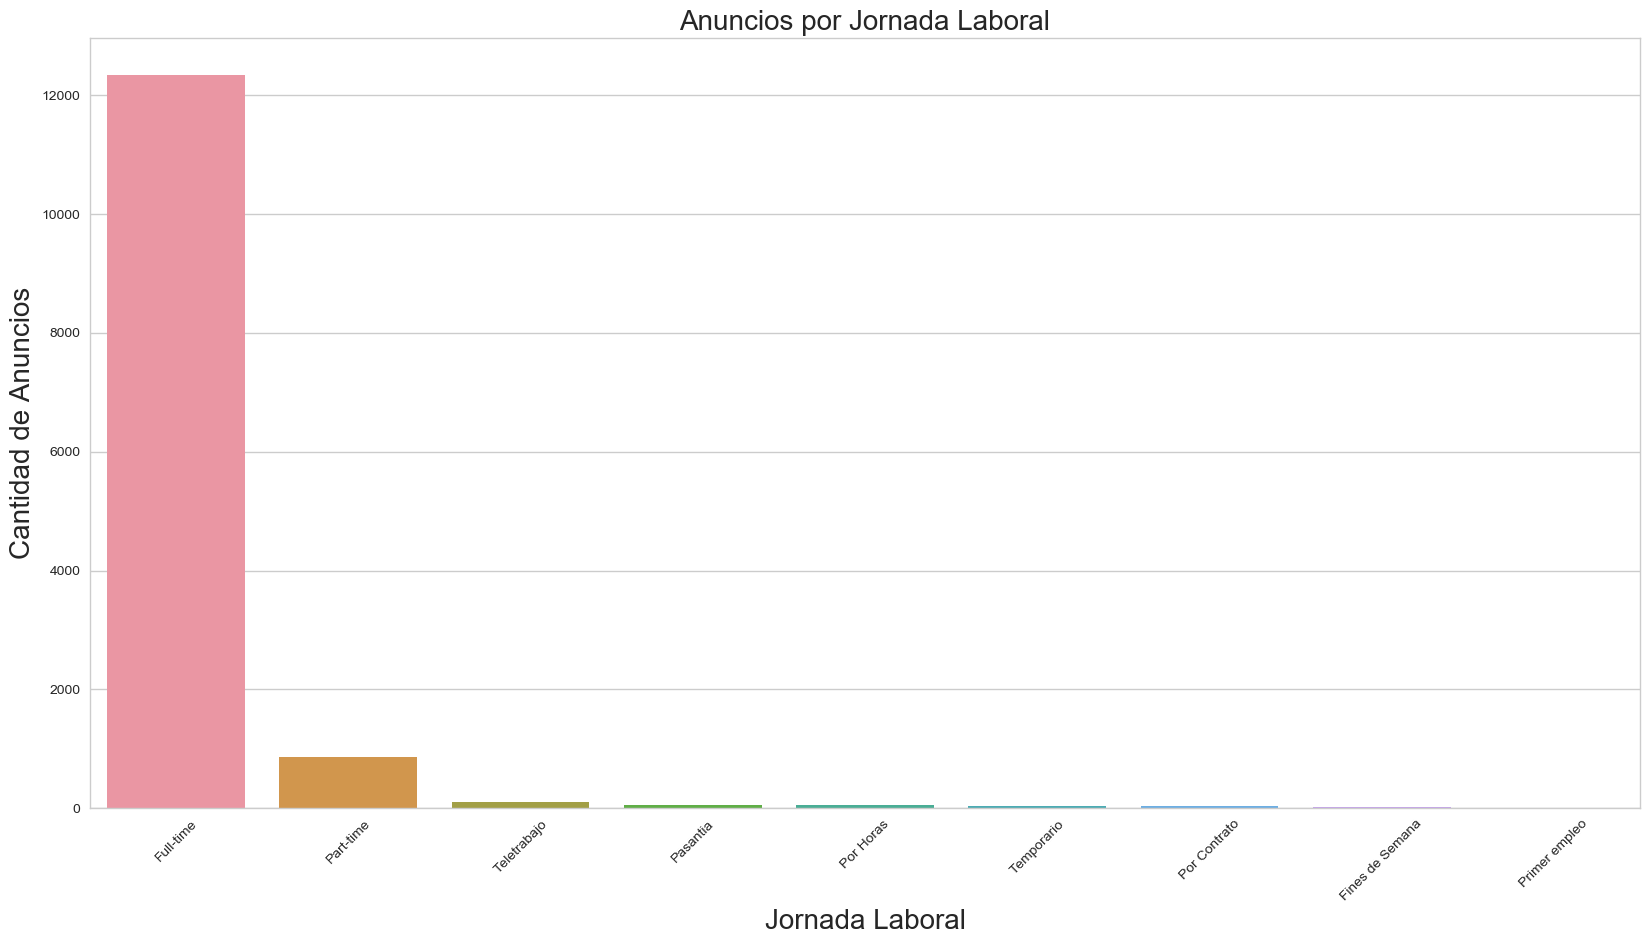

In [585]:
# analicemos distribución de avisos por tipo de trabajo
workday_announcements = sns.countplot(x='tipo_de_trabajo', data=avisos, order=avisos['tipo_de_trabajo'].value_counts().index, orient='v')
workday_announcements.set_xticklabels(workday_announcements.get_xticklabels(),rotation=45)
workday_announcements.set_xlabel("Jornada Laboral", fontsize=20)
workday_announcements.set_ylabel("Cantidad de Anuncios", fontsize=20)
workday_announcements.set_title("Anuncios por Jornada Laboral", fontsize=20)

Text(0.5,1,'Anuncios por Seniority')

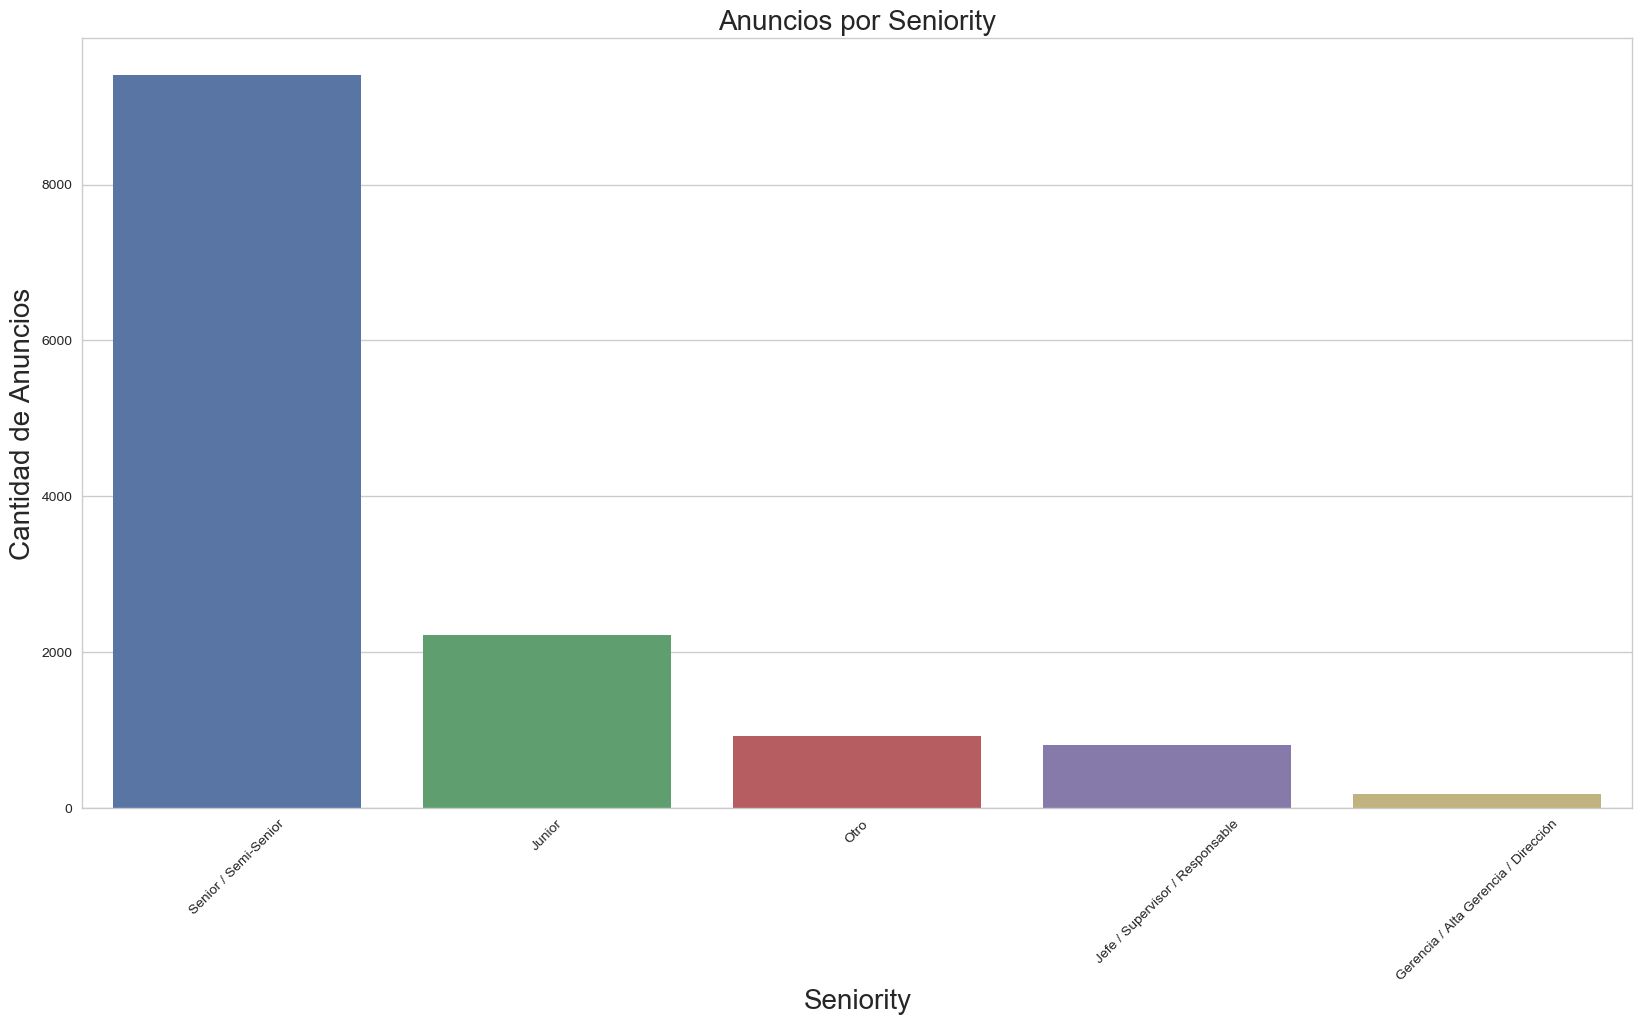

In [586]:
# analicemos distribución de avisos por seniority
seniority_types = sns.countplot(x='nivel_laboral', data=avisos, order=avisos['nivel_laboral'].value_counts().index, orient='v')
seniority_types.set_xticklabels(seniority_types.get_xticklabels(),rotation=45)
seniority_types.set_xlabel("Seniority", fontsize=20)
seniority_types.set_ylabel("Cantidad de Anuncios", fontsize=20)
seniority_types.set_title("Anuncios por Seniority", fontsize=20)

In [587]:
# analicemos la relacion seniority-tipo de trabajo con un heatmap
for_heatmap = avisos.pivot_table(index='tipo_de_trabajo', columns='nivel_laboral', values= 'idaviso', aggfunc='count', fill_value=0)

Text(222.316,0.5,'Jornada Laboral')

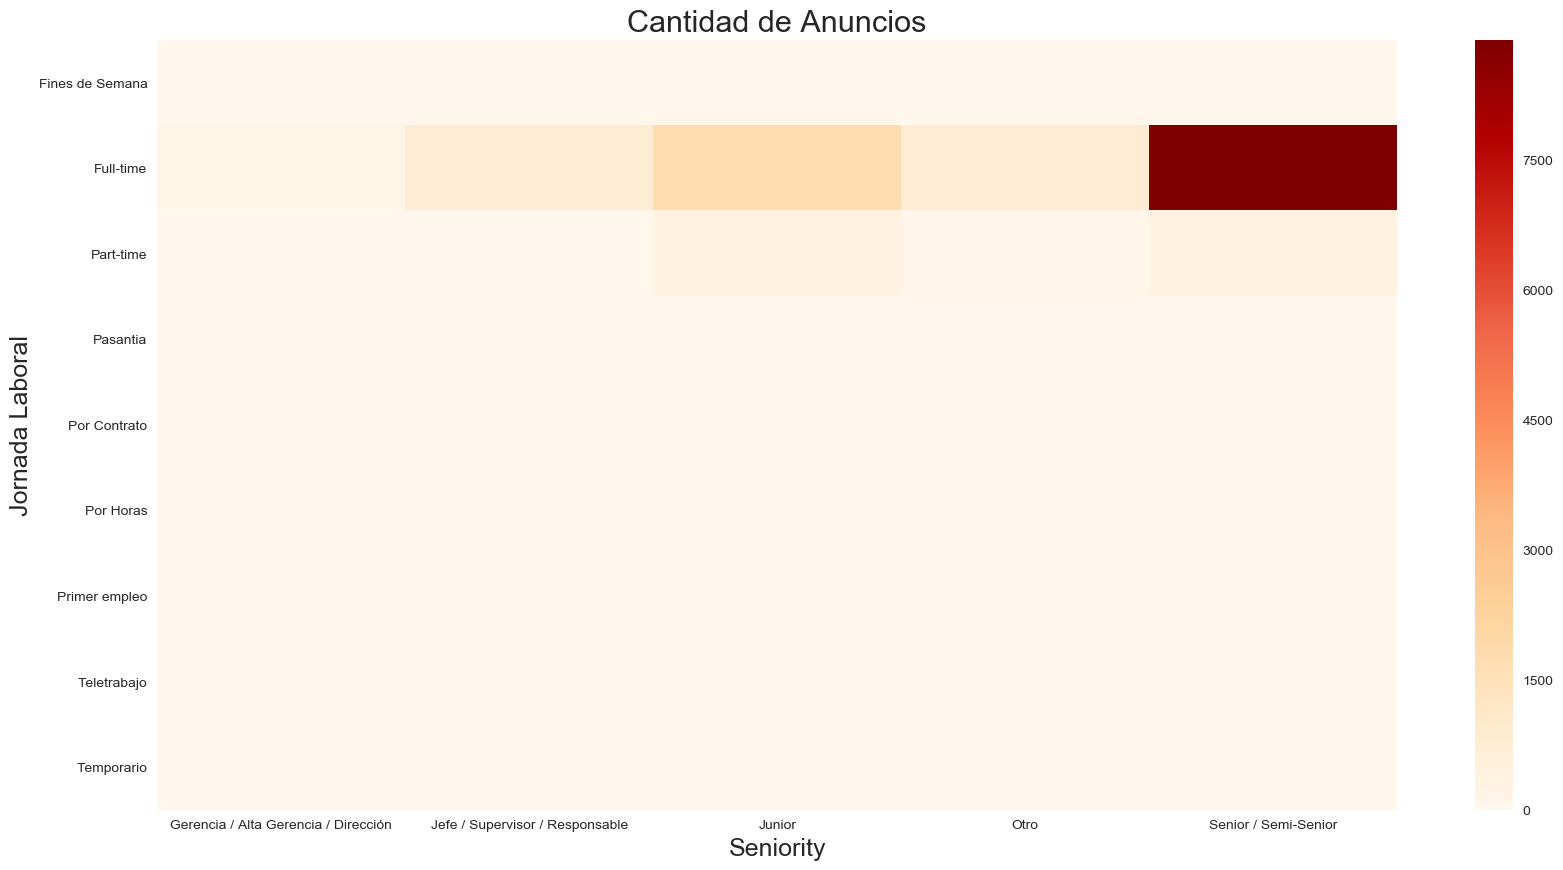

In [593]:
seniority_tipo_heat_map = sns.heatmap(for_heatmap,  cmap="OrRd")
seniority_tipo_heat_map.set_title("Cantidad de Anuncios", fontsize=22)
seniority_tipo_heat_map.set_xlabel("Seniority",fontsize=18)
seniority_tipo_heat_map.set_ylabel("Jornada Laboral", fontsize=18)

In [555]:
# fixeemos las fechas de nacimiento para los postulantes, que podemos ver que estan en distintos formatos 
postulantes_con_fecha_nacimiento = postulantes.dropna()
postulantes_con_fecha_nacimiento['fechanacimiento_datetime'] = pd.to_datetime(postulantes_con_fecha_nacimiento['fechanacimiento'], infer_datetime_format=True, errors='coerce')
postulantes_con_fecha_nacimiento['fechanacimiento_datetime_2'] = pd.to_datetime(postulantes_con_fecha_nacimiento['fechanacimiento'].str[2:], format='%d-%m-%y', errors='coerce')
postulantes_con_fecha_nacimiento['fixed_birth_date'] = postulantes_con_fecha_nacimiento.apply(lambda x: x[5] if pd.isnull(x[6]) else x[6],axis=1)
postulantes_con_fecha_nacimiento.drop(columns=['fechanacimiento_datetime', 'fechanacimiento_datetime_2'], inplace=True)
postulantes_con_fecha_nacimiento['fixed_birth_date'] = pd.to_datetime(postulantes_con_fecha_nacimiento['fixed_birth_date'])
postulantes_con_fecha_nacimiento['fixed_birth_date'] = postulantes_con_fecha_nacimiento['fixed_birth_date'].dropna()
#filtro elementos con fecha invalida
postulantes_con_fecha_nacimiento = postulantes_con_fecha_nacimiento[pd.notnull(postulantes_con_fecha_nacimiento['fixed_birth_date'])]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [556]:
#Agrego columna con la edad
postulantes_con_fecha_nacimiento['age'] = postulantes_con_fecha_nacimiento['fixed_birth_date'].apply(lambda d: int(2018 - d.year))
postulantes_con_fecha_nacimiento.tail()
postulantes_con_fecha_nacimiento['nombre'].value_counts()

Secundario           108588
Universitario        103119
Terciario/Técnico     47234
Otro                  24594
Posgrado               7344
Master                 3577
Doctorado               211
Name: nombre, dtype: int64

In [557]:
# analicemos la relacion edad de estudiantes-titulo universitario con un bar plot
postulantes_con_fecha_nacimiento_universitario_terminado = postulantes_con_fecha_nacimiento.loc[(postulantes_con_fecha_nacimiento['nombre'] == 'Universitario') & (postulantes_con_fecha_nacimiento['estado'] == 'Graduado'),:]
postulantes_con_fecha_nacimiento_universitario_terminado.tail()

,idpostulante,nombre,estado,fechanacimiento,sexo,fixed_birth_date,age
297971,Ezem8D2,Universitario,Graduado,1996-06-20,F,1996-06-20,22
297982,xkd652a,Universitario,Graduado,1994-11-11,M,1994-11-11,24
297985,Ezem85J,Universitario,Graduado,1993-01-13,F,1993-01-13,25
297989,pzdkx4b,Universitario,Graduado,1994-07-02,M,1994-07-02,24
298011,GNZqAKN,Universitario,Graduado,1993-03-12,M,1993-03-12,25


In [558]:
#agrupo por edad y cantidad de titulos
university_titles_per_age = postulantes_con_fecha_nacimiento_universitario_terminado.groupby('age').agg({'nombre': 'count'}) 
university_titles_per_age.reset_index(inplace=True)
university_titles_per_age.columns = ['age', 'quantity_of_university_titles']
university_titles_per_age = university_titles_per_age.loc[university_titles_per_age['age'] > 0, :]
university_titles_per_age


,age,quantity_of_university_titles
1,17,1
2,18,4
3,19,7
4,20,29
5,21,72
6,22,227
7,23,596
8,24,1074
9,25,1637
10,26,2198


Text(0,0.5,'Cantidad de Graduados')

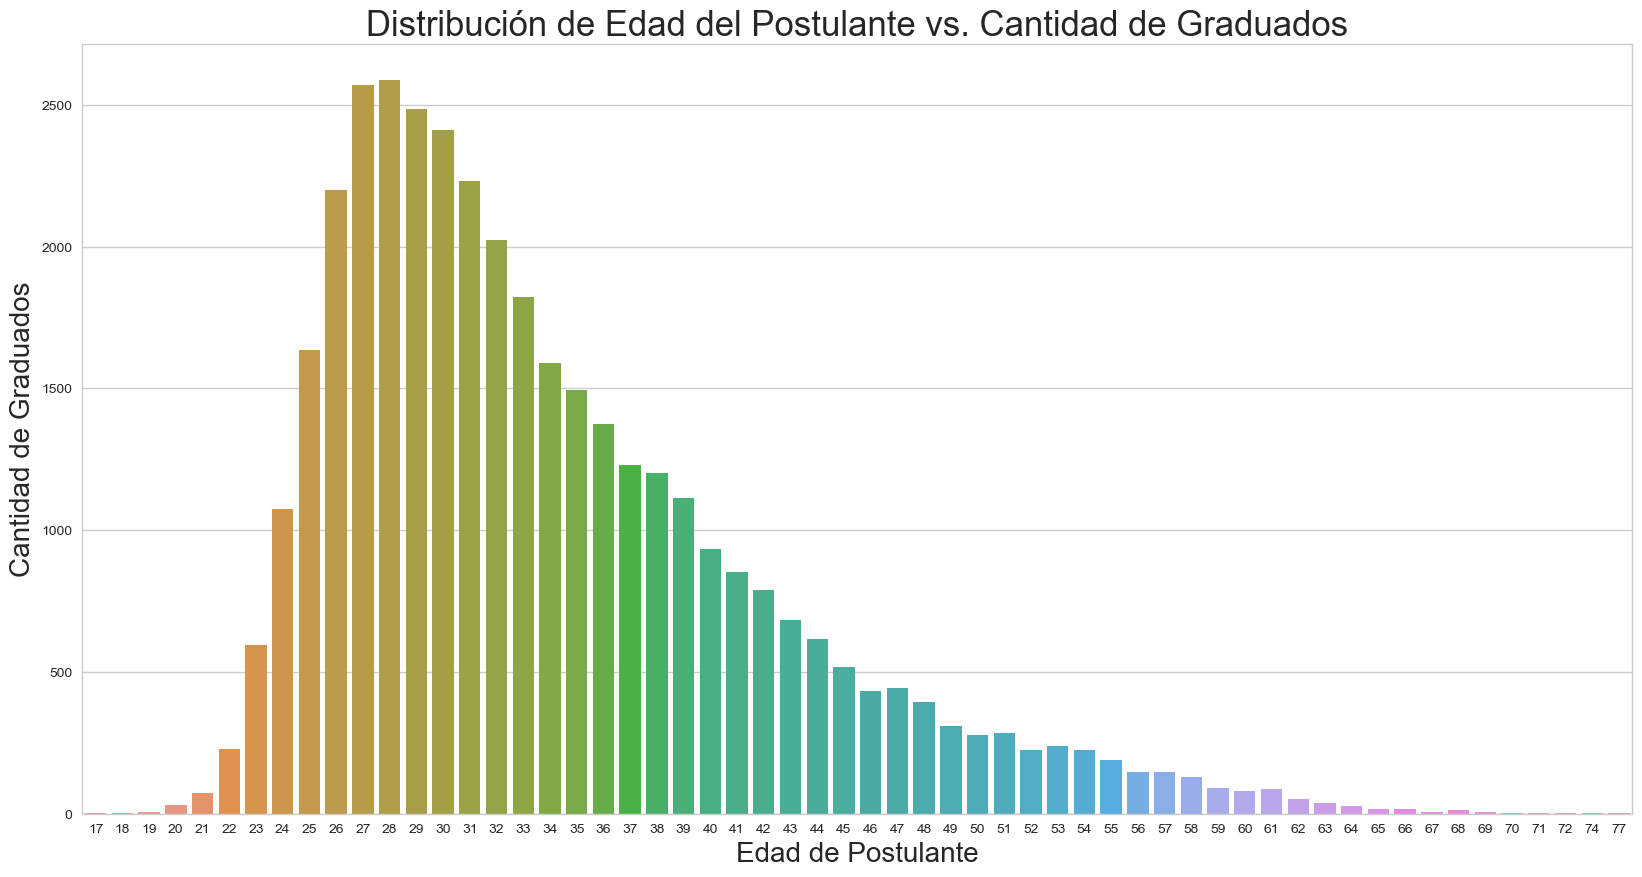

In [559]:
# creo el bar plot
plt.rcParams["axes.labelsize"] = 30
university_per_age_graph = sns.barplot(x=university_titles_per_age['age'], y=university_titles_per_age['quantity_of_university_titles'], orient='v')
university_per_age_graph.set_title("Distribución de Edad del Postulante vs. Cantidad de Graduados", fontsize=25)
university_per_age_graph.set_xlabel("Edad de Postulante", fontsize=20)
university_per_age_graph.set_ylabel("Cantidad de Graduados", fontsize=20)
#es similar a la distribución de postulaciones por edades

In [560]:
#ahora podriamos analizar por edad, el rate de postulantes que estan graduados universitariamente frente a los que no
postulantes_con_fecha_nacimiento['graduado_universitario'] = postulantes_con_fecha_nacimiento['idpostulante'].isin(postulantes_con_fecha_nacimiento_universitario_terminado['idpostulante'])
postulantes_con_fecha_nacimiento['graduado_universitario'] = postulantes_con_fecha_nacimiento['graduado_universitario'].astype(int)
postulantes_con_fecha_nacimiento_reduced = postulantes_con_fecha_nacimiento[['idpostulante', 'age', 'graduado_universitario']]
postulantes_con_fecha_nacimiento_reduced = postulantes_con_fecha_nacimiento_reduced.drop_duplicates('idpostulante', keep='first')
postulantes_con_fecha_nacimiento_reduced


,idpostulante,age,graduado_universitario
0,NdJl,49,1
1,8BkL,42,1
2,1d2B,42,0
3,NPBx,37,1
5,Ym2X,54,1
6,ZKl5,44,1
7,EDD99,52,1
8,Y043Z,39,0
9,6M3jr,43,0
10,EpDDJ,57,0


In [561]:
#agrupamos por cantidad y suma ahora
university_status_per_age = postulantes_con_fecha_nacimiento_reduced.groupby('age').agg({'graduado_universitario': ['count', 'sum']}) 
level0 = university_status_per_age.columns.get_level_values(0)
level1 = university_status_per_age.columns.get_level_values(1)
university_status_per_age.columns = level0 + '_' + level1
university_status_per_age = university_status_per_age.reset_index()
university_status_per_age = university_status_per_age.loc[university_status_per_age['age'].ge(18) & university_status_per_age['age'].le(71)]


In [562]:
#calculamos el rate
university_status_per_age['graduated_rate'] = university_status_per_age['graduado_universitario_sum'] / university_status_per_age['graduado_universitario_count']
university_status_per_age = university_status_per_age.loc[university_status_per_age['graduado_universitario_count'].gt(40)]
university_status_per_age.tail()

,age,graduado_universitario_count,graduado_universitario_sum,graduated_rate
48,60,207,80,0.386473
49,61,169,88,0.520710
50,62,144,52,0.361111
51,63,82,38,0.463415
52,64,63,26,0.412698


Text(0,0.5,'Rate de Graduados')

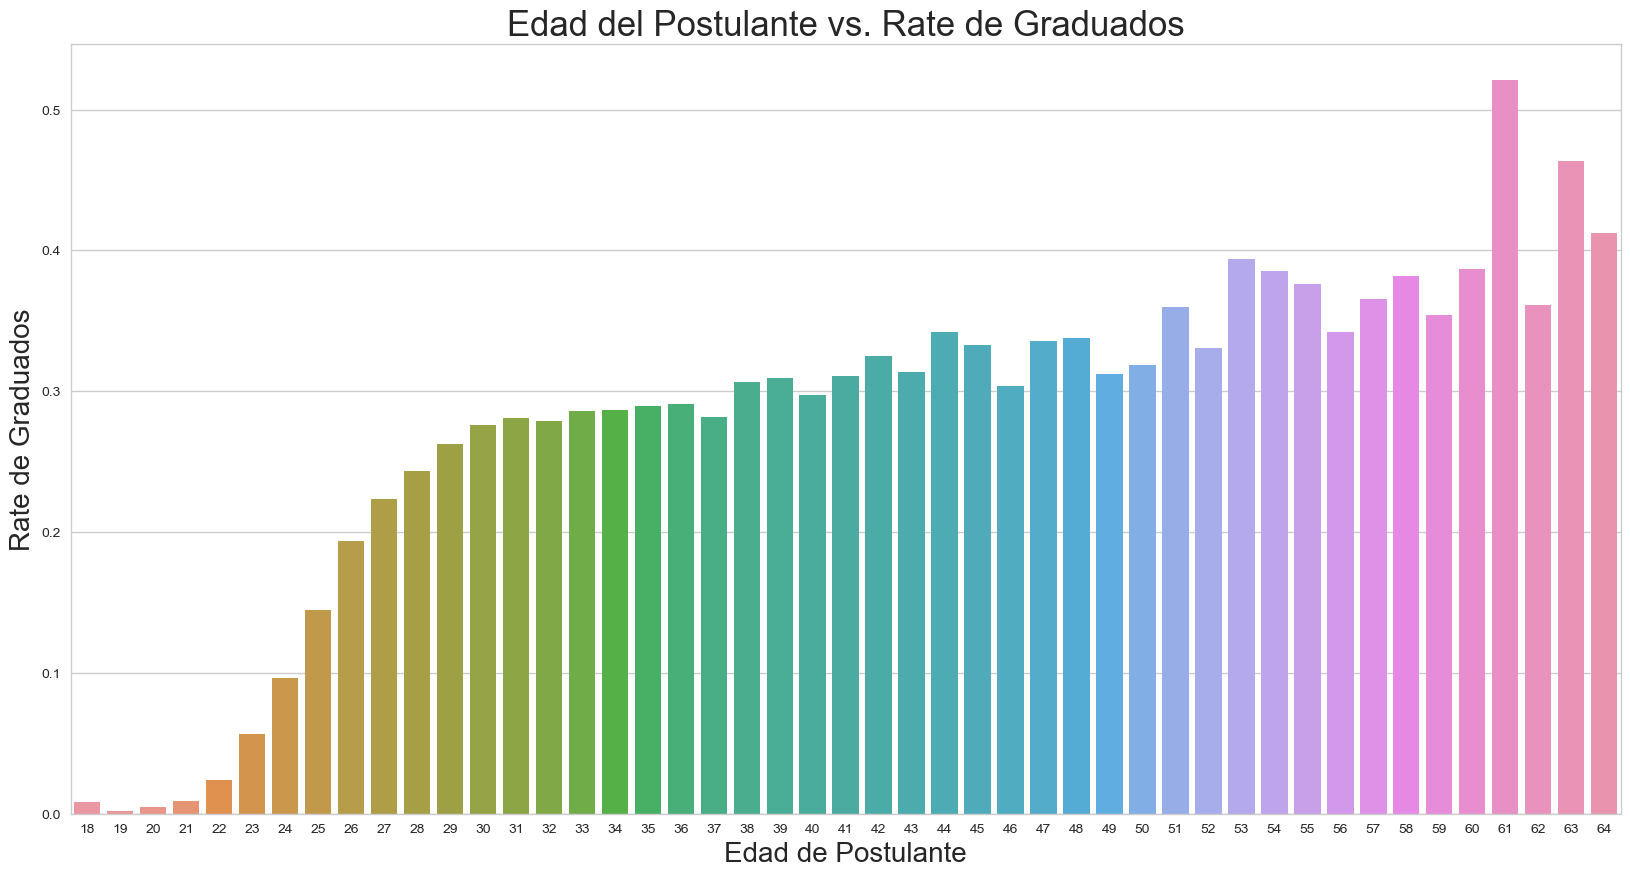

In [563]:
# creo el bar plot
plt.rcParams["axes.labelsize"] = 30
university_state_per_age_graph = sns.barplot(x=university_status_per_age['age'], y=university_status_per_age['graduated_rate'], orient='v')
university_state_per_age_graph.set_title("Edad del Postulante vs. Rate de Graduados", fontsize=25)
university_state_per_age_graph.set_xlabel("Edad de Postulante", fontsize=20)
university_state_per_age_graph.set_ylabel("Rate de Graduados", fontsize=20)

In [564]:
#analicemos el promedio de edad de las vistas por area
vistas_y_postulantes = vistas.join(postulantes_con_fecha_nacimiento_reduced.set_index('idpostulante'), on='idpostulante')
vistas_y_postulantes = vistas_y_postulantes.dropna(how='any')
vistas_y_postulantes_con_area = vistas_y_postulantes.join(avisos.set_index('idaviso'), on='idAviso')
vistas_y_postulantes_con_area_reduced = vistas_y_postulantes_con_area[['idAviso', 'idpostulante', 'age', 'nombre_area']]
vistas_y_postulantes_con_area_reduced.tail()

,idAviso,idpostulante,age,nombre_area
961892,1112366944,MVPj3AK,20.0,Recepcionista
961893,1001442844,VNrYP6m,23.0,Ventas
961894,1112362644,owzLD43,22.0,Administración
961895,1112305277,A3DraY1,28.0,Tesorería
961896,1112345900,ekmNzBW,24.0,Atención al Cliente


In [565]:
#agrupamos y obtenemos el promedio de edad y la cantidad de postulaciones por area
vistas_y_postulantes_con_area_grouped = vistas_y_postulantes_con_area_reduced.groupby('nombre_area').agg({'age': ['mean', 'count']})
level0 = vistas_y_postulantes_con_area_grouped.columns.get_level_values(0)
level1 = vistas_y_postulantes_con_area_grouped.columns.get_level_values(1)
vistas_y_postulantes_con_area_grouped.columns = level0 + '_' + level1
vistas_y_postulantes_con_area_grouped.columns = ['age_avg', 'postulations_quantity']
vistas_y_postulantes_con_area_grouped = vistas_y_postulantes_con_area_grouped.reset_index()
vistas_y_postulantes_con_area_grouped.tail()

,nombre_area,age_avg,postulations_quantity
154,Turismo,28.795009,561
155,Venta de Seguros,30.882303,1181
156,Ventas,28.828116,118219
157,Ventas Internacionales/Exportación,29.201790,2458
158,Veterinaria,32.148148,27


In [566]:
#obtenemos las 50 areas con mayor cantidad de postulaciones y filtramos las 10 con menor promedio de edad
areas_con_menor_age_avg = vistas_y_postulantes_con_area_grouped.nlargest(75, 'postulations_quantity').nsmallest(10, 'age_avg').sort_values('age_avg', ascending=True)

Text(0,0.5,'Area')

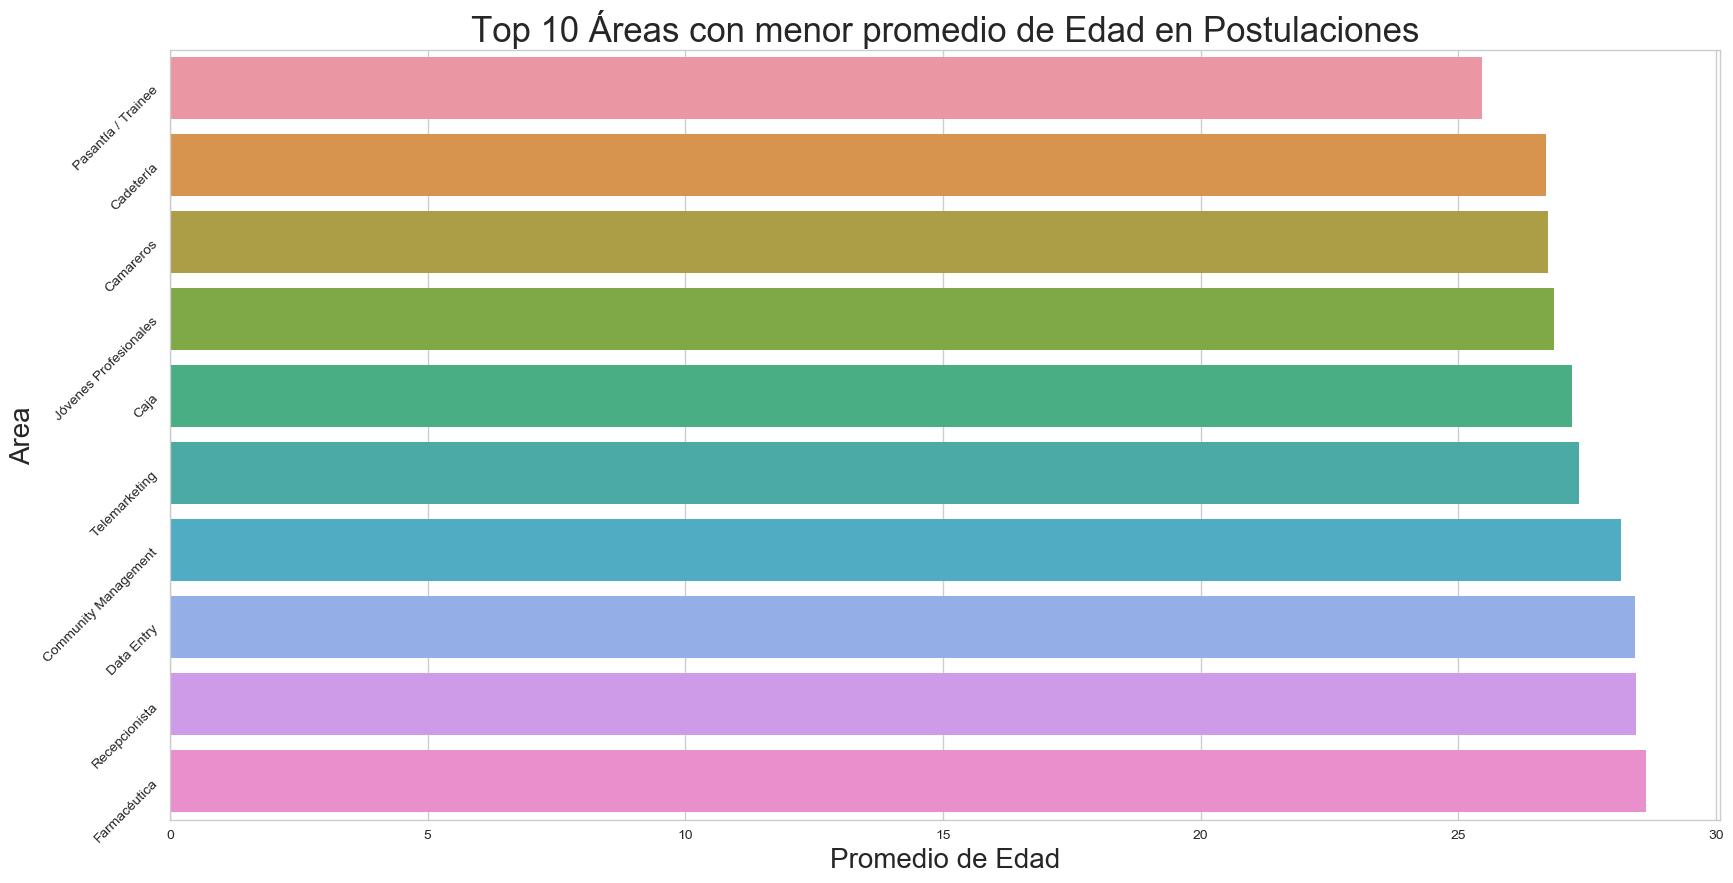

In [568]:
# graficamos el resultado anterior en un Bar Plot
plt.rcParams["axes.labelsize"] = 30
plt.yticks(rotation=45)
areas_con_menor_age_avg_graph = sns.barplot(x=areas_con_menor_age_avg['age_avg'], y=areas_con_menor_age_avg['nombre_area'], orient='h')
areas_con_menor_age_avg_graph.set_title("Top 10 Áreas con menor promedio de Edad en Postulaciones", fontsize=25)
areas_con_menor_age_avg_graph.set_xlabel("Promedio de Edad", fontsize=20)
areas_con_menor_age_avg_graph.set_ylabel("Area", fontsize=20)


In [569]:
#obtenemos las 50 areas con mayor cantidad de postulaciones y filtramos las 10 con mayor promedio de edad
areas_con_mayor_age_avg = vistas_y_postulantes_con_area_grouped.nlargest(75, 'postulations_quantity').nlargest(10, 'age_avg').sort_values('age_avg', ascending=False)

Text(0,0.5,'Area')

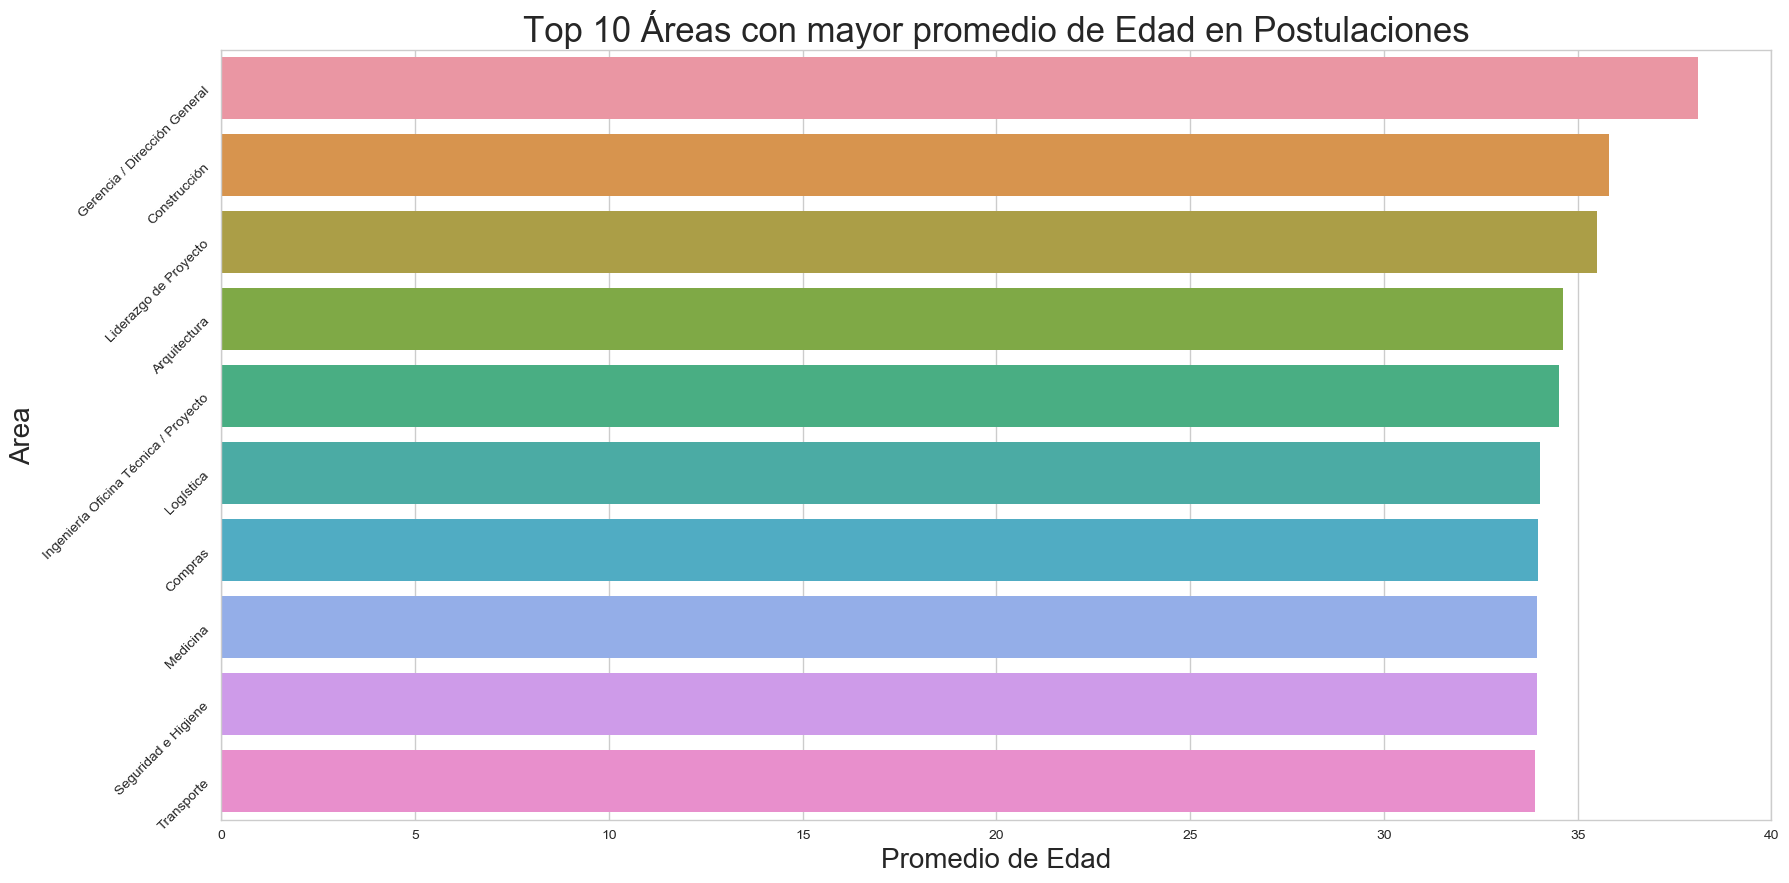

In [570]:
# analicemos categorias mas importantes con un bar plot
plt.rcParams["axes.labelsize"] = 30
plt.yticks(rotation=45)
areas_con_mayor_age_avg_graph = sns.barplot(x=areas_con_mayor_age_avg['age_avg'], y=areas_con_mayor_age_avg['nombre_area'], orient='h')
areas_con_mayor_age_avg_graph.set_title("Top 10 Áreas con mayor promedio de Edad en Postulaciones", fontsize=25)
areas_con_mayor_age_avg_graph.set_xlabel("Promedio de Edad", fontsize=20)
areas_con_mayor_age_avg_graph.set_ylabel("Area", fontsize=20)


Text(0,0.5,'Promedio de Edad por Área')

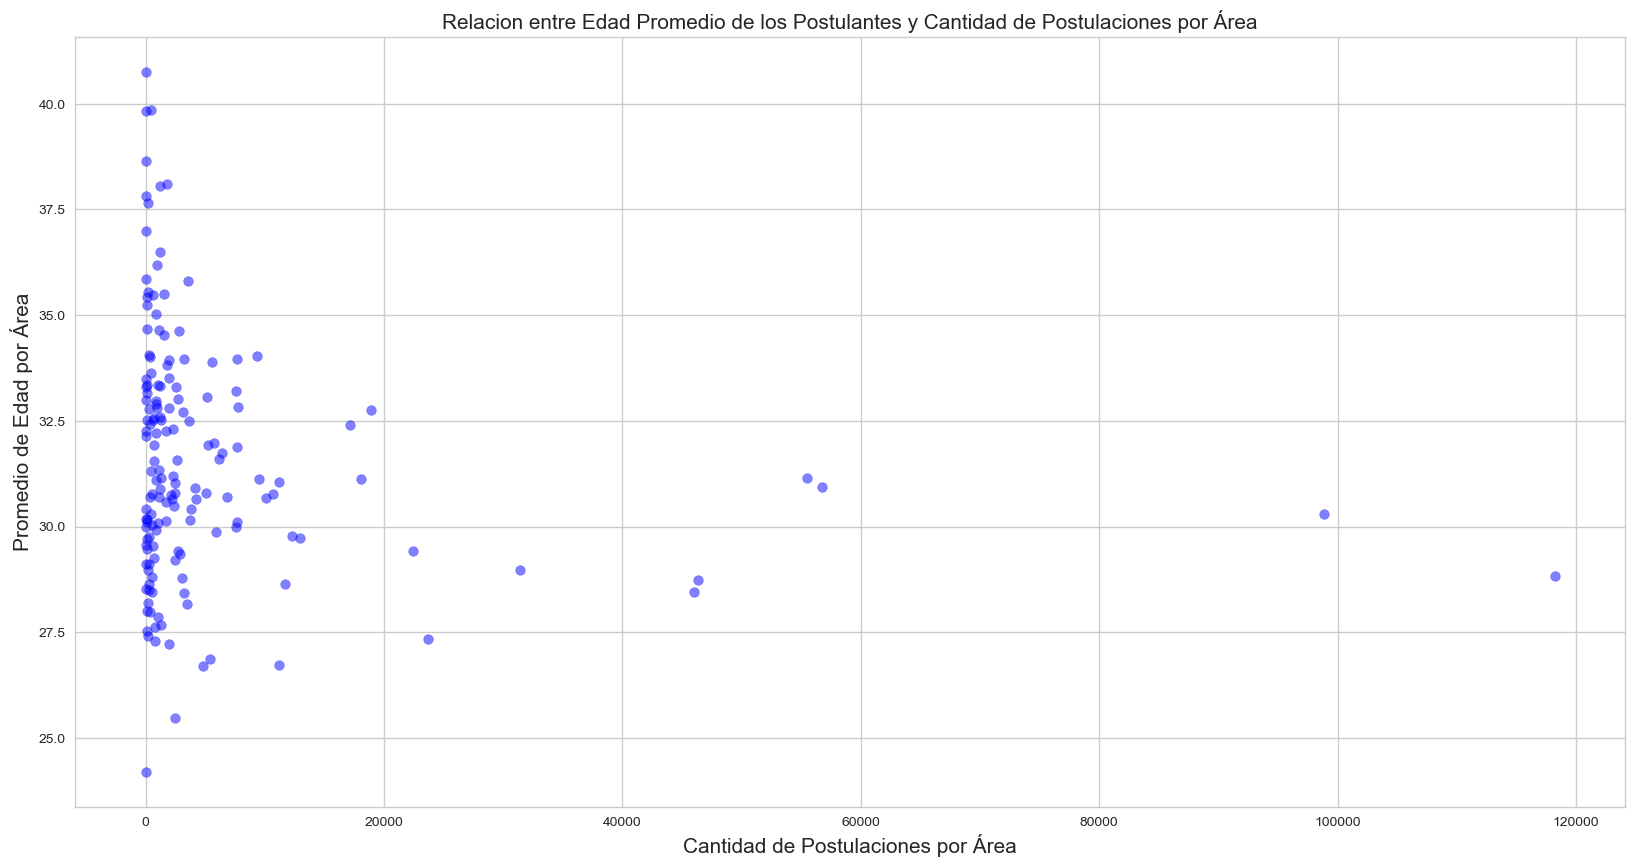

In [572]:
# veamos si podemos encontrar ahora una relacion independiente de las areas entre la cantidad de postulaciones y el promedio de edad de los postulantes
# para cada area, tomamos el par cantidad de postulaciones, promedio de edad de postulantes y realizamos un scatter plot
age_avg_postulations_quantity_scatter = plt.scatter(vistas_y_postulantes_con_area_grouped.loc[:, 'postulations_quantity'],vistas_y_postulantes_con_area_grouped.loc[:, 'age_avg'], alpha='0.5', color='blue')
plt.title("Relacion entre Edad Promedio de los Postulantes y Cantidad de Postulaciones por Área", fontsize=15)
plt.xlabel("Cantidad de Postulaciones por Área", fontsize=15)
plt.ylabel("Promedio de Edad por Área", fontsize=15)
# podemos ver que las areas con mayor edad promedio en los postulantes tienen menor postulaciones en el sitio
# ademas las areas con edad promedio entre 30-35 años tienen mayor postulaciones en el sitio

In [573]:
# veamos ahora si hay algun area especifica con alto perfil tecnico de sus postulantes
postulantes_graduated = postulantes_con_fecha_nacimiento_reduced[['idpostulante', 'graduado_universitario']]
postulaciones_con_nivel = postulaciones.join(postulantes_graduated.set_index('idpostulante'), on='idpostulante')
avisos_nombre_area = avisos[['idaviso','nombre_area']]
postulaciones_con_nivel_por_area = postulaciones_con_nivel.join(avisos_nombre_area.set_index('idaviso'), on='idaviso')
postulaciones_grouped_by_area = postulaciones_con_nivel_por_area.groupby('nombre_area').agg({'graduado_universitario': ['count', 'sum']})
level0 = postulaciones_grouped_by_area.columns.get_level_values(0)
level1 = postulaciones_grouped_by_area.columns.get_level_values(1)
postulaciones_grouped_by_area.columns = level0 + '_' + level1
postulaciones_grouped_by_area.columns = ['total_postulants','graduated_postulants']
postulaciones_grouped_by_area = postulaciones_grouped_by_area.reset_index()

In [574]:
#calculo rate de graduados
postulaciones_grouped_by_area['graduated_postulants'] = postulaciones_grouped_by_area['graduated_postulants'].apply(lambda x: int(x))
postulaciones_grouped_by_area['graduated_rate'] = postulaciones_grouped_by_area['graduated_postulants'] /  postulaciones_grouped_by_area['total_postulants']

In [575]:
#analizamos las 10 areas que tienen mayor perfil tecnico entre las 75 areas con mas postulaciones
largest_technical_profile = postulaciones_grouped_by_area.nlargest(75, 'total_postulants').nlargest(10, 'graduated_rate')

Text(0,0.5,'Relacion Graduados/Total')

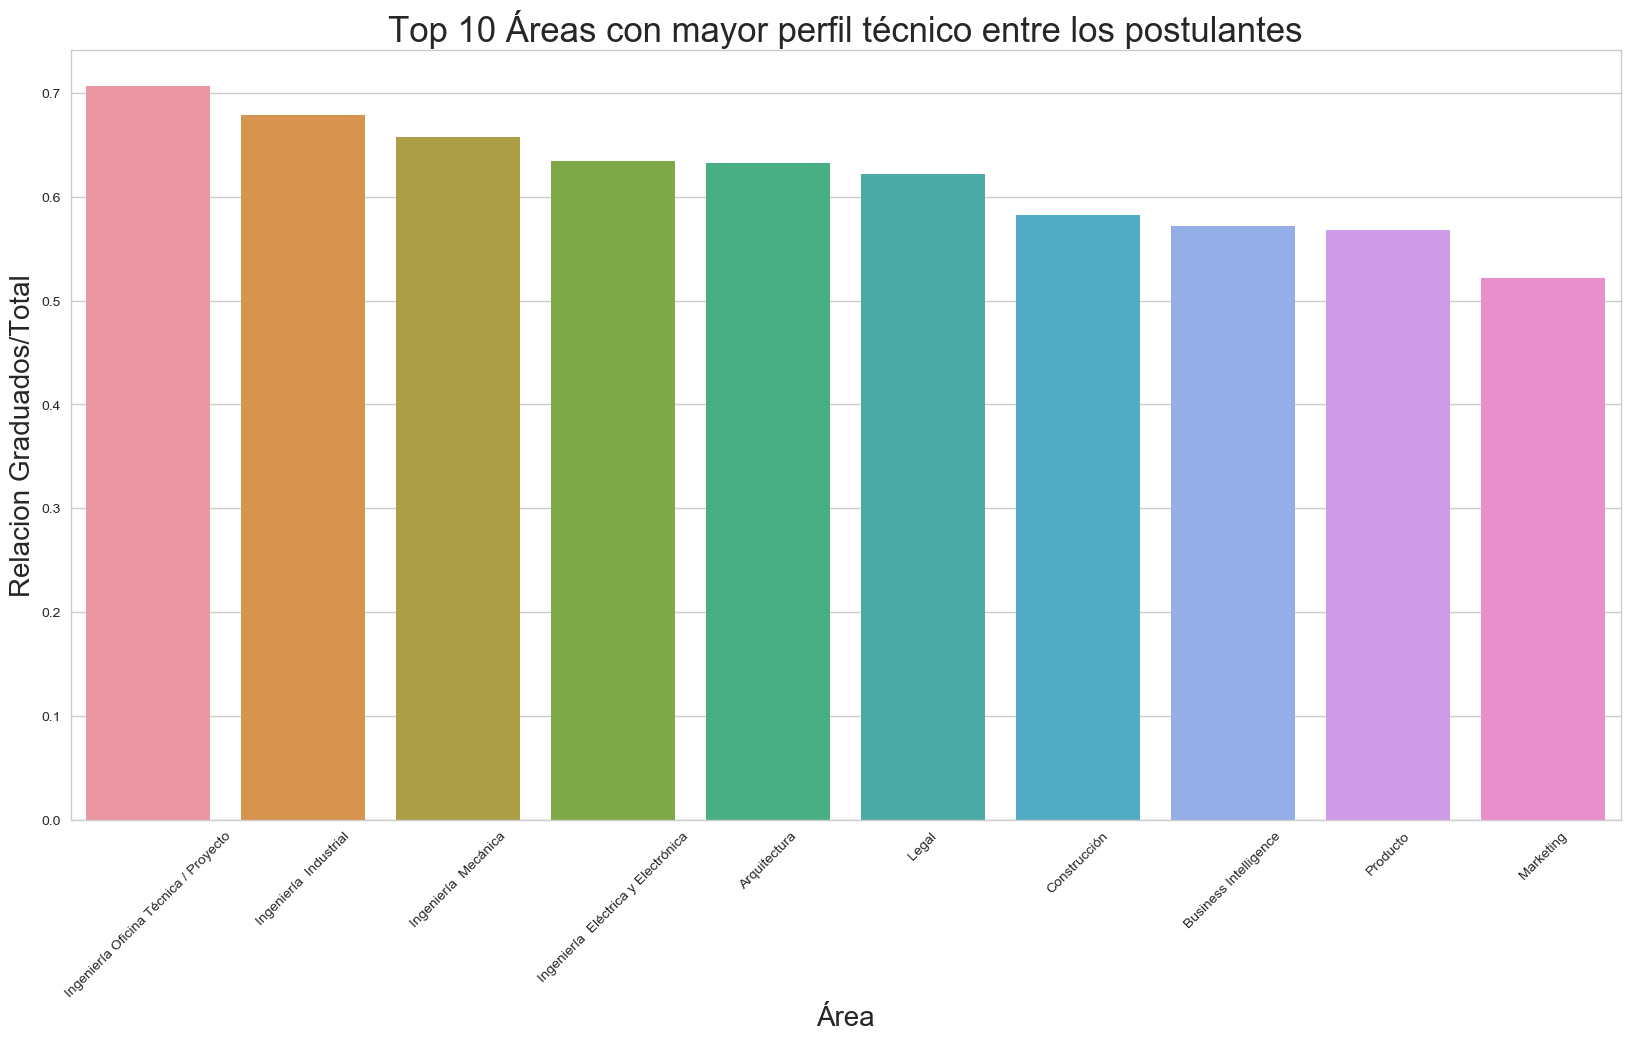

In [577]:
# analicemos el resultado anterior con un bar plot
plt.rcParams["axes.labelsize"] = 30
plt.xticks(rotation=45)
largest_technical_profile_graph = sns.barplot(x=largest_technical_profile['nombre_area'], y=largest_technical_profile['graduated_rate'], orient='v')
largest_technical_profile_graph.set_title("Top 10 Áreas con mayor perfil técnico entre los postulantes", fontsize=25)
largest_technical_profile_graph.set_xlabel("Área", fontsize=20)
largest_technical_profile_graph.set_ylabel("Relacion Graduados/Total", fontsize=20)


In [552]:
#analizamos las 10 areas que tienen menor perfil tecnico entre las 75 areas con mas postulaciones
smallest_technical_profile = postulaciones_grouped_by_area.nlargest(75, 'total_postulants').nsmallest(10, 'graduated_rate')

Text(0,0.5,'Relación Graduados/Total')

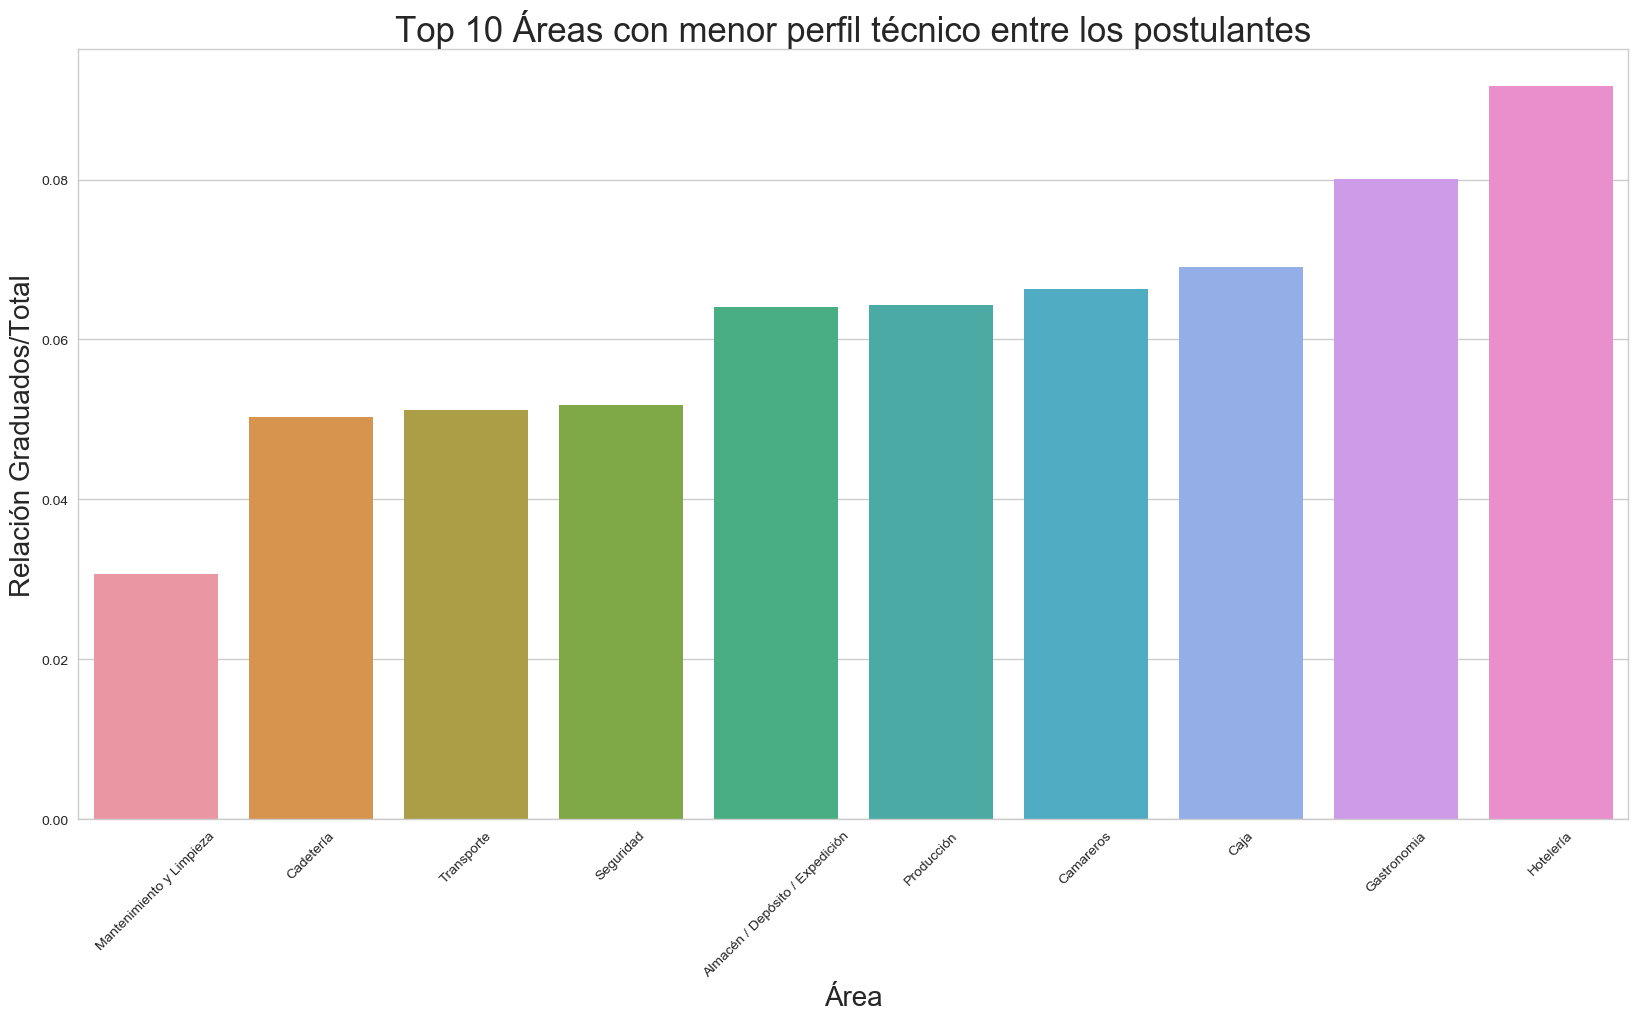

In [578]:
# analicemos el resultado anterior con un bar plot
plt.rcParams["axes.labelsize"] = 30
plt.xticks(rotation=45)
smallest_technical_profile_graph = sns.barplot(x=smallest_technical_profile['nombre_area'], y=smallest_technical_profile['graduated_rate'], orient='v')
smallest_technical_profile_graph.set_title("Top 10 Áreas con menor perfil técnico entre los postulantes", fontsize=25)
smallest_technical_profile_graph.set_xlabel("Área", fontsize=20)
smallest_technical_profile_graph.set_ylabel("Relación Graduados/Total", fontsize=20)
